## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df =  pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(keep=False)]


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#result_df=combined_df.drop_duplicates(subset=['Mouse ID'])
#result_df

result_df = combined_df[combined_df['Mouse ID'].isin(['g989'])==False]
result_df.head()


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
result_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
##############################################################
tumorvolume_mean = result_df.groupby(['Drug Regimen']) ['Tumour Volume (mm3)'].mean()
tumorvolume_std = result_df.groupby(['Drug Regimen']) ['Tumour Volume (mm3)'].std()
tumorvolume_med = result_df.groupby(['Drug Regimen']) ['Tumour Volume (mm3)'].median()
tumorvolume_var = result_df.groupby(['Drug Regimen']) ['Tumour Volume (mm3)'].var()
tumorvolume_sem = result_df.groupby(['Drug Regimen']) ['Tumour Volume (mm3)'].sem()


#Concatenating series values into dataframe
concat1 = pd.merge(tumorvolume_mean, tumorvolume_std, how="left", on=["Drug Regimen"])
concat1=concat1.rename(columns=
                            {"Tumour Volume (mm3)_x":"Mean" ,
                             "Tumour Volume (mm3)_y":"Standard Deviation" 
                            })
concat2 = pd.merge(concat1, tumorvolume_med, how="left", on=["Drug Regimen"])
concat2=concat2.rename(columns=
                            {"Tumour Volume (mm3)":"Median"  
                            })
concat3 = pd.merge(concat2, tumorvolume_var, how="left", on=["Drug Regimen"])
concat3=concat3.rename(columns=
                            {"Tumour Volume (mm3)":"Variance"  
                            })
concat4 = pd.merge(concat3, tumorvolume_sem, how="left", on=["Drug Regimen"])
concat4=concat4.rename(columns=
                            {"Tumour Volume (mm3)":"SEM"  
                            })

concat4
#print(f"The mean value is {tumorvolume_mean}")
#print(f"The standard value is {tumorvolume_std}")
#print(f"The median value is {tumorvolume_med}")
#print(f"The variance value is {tumorvolume_var}")
#print(f"The SEM value is {tumorvolume_sem}")


,Mean,Standard Deviation,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#I figured out the above statistic table can be generated using agg() 
final_result_df = result_df.groupby(['Drug Regimen']) ['Tumour Volume (mm3)'].aggregate(['mean','std','median','var','sem'])
final_result_df


,mean,std,median,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar and Pie Charts

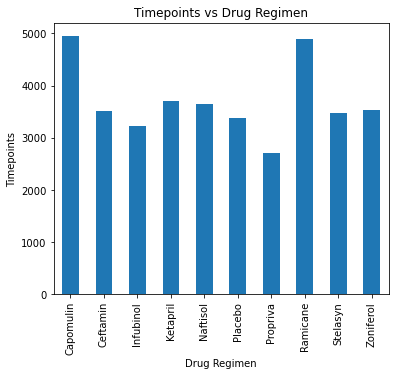

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_vs_timepoint = combined_df.groupby(['Drug Regimen']) ['Timepoint'].sum()
bar_chart= regimen_vs_timepoint.plot(kind="bar", figsize=(6,5))

# Set a title for the chart
plt.title("Timepoints vs Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Timepoints")

plt.show()
plt.tight_layout()



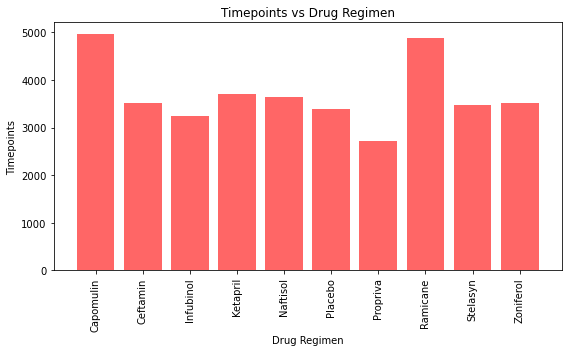

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_df = pd.DataFrame(regimen_vs_timepoint)

x_axis = bar_df.index
y_axis = bar_df["Timepoint"]
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, bar_df.index , rotation="vertical")
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(rain_df["Millimetres"])+50)
plt.title("Timepoints vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.tight_layout()
#plt.savefig("../Images/avg_cities_rain.png")
plt.show()



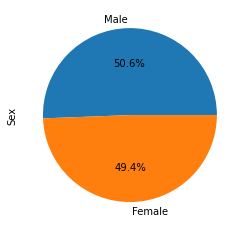

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Takes the column that contains the sex of mouse and counts each unique value (in this case, the unique value is Male or Female)
distribution =combined_df['Sex'].value_counts()

# Takes the distrubiton variable from the last step and plots a pie chart with the percent distribution labels (specified by "autopct")
distribution.plot(kind="pie",autopct='%1.1f%%')
# Shows the plot
plt.show()


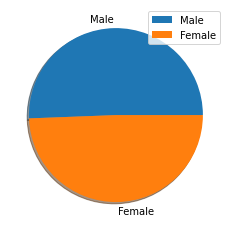

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df = pd.DataFrame(distribution)
y = pie_df['Sex']
mylabels = pie_df.index
plt.pie(y, labels = mylabels,shadow = True)
plt.legend()
plt.show() 


## Quartiles, Outliers and Boxplots

In [13]:
result_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

##AP Code##
#tumorvolume_groupby = combined_df.groupby(['Drug Regimen','Mouse ID']) ['Tumour Volume (mm3)'].max()
#tumorvolume_groupby_df=pd.DataFrame(tumorvolume_groupby)
#tumorvolume_groupby_df.reset_index(inplace=True)
#print(tumorvolume_groupby_df)

#Checking data for the greatest value of timepoint
#combined_df.loc[( (combined_df['Drug Regimen']=='Capomulin') & (combined_df['Mouse ID']=='b128') )]

max_tumor = result_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(result_df,on=['Mouse ID','Timepoint'],how="left")
merged_data



,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumour vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumour volumes
    # add subset 
    # Determine outliers using upper and lower bounds

#treatments = [value for value in merged_data['Drug Regimen']]
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumour Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'The outlier {outliers} for {drug}')

The outlier Series([], Name: Tumour Volume (mm3), dtype: float64) for Capomulin
The outlier Series([], Name: Tumour Volume (mm3), dtype: float64) for Ramicane
The outlier 31    36.321346
Name: Tumour Volume (mm3), dtype: float64 for Infubinol
The outlier Series([], Name: Tumour Volume (mm3), dtype: float64) for Ceftamin


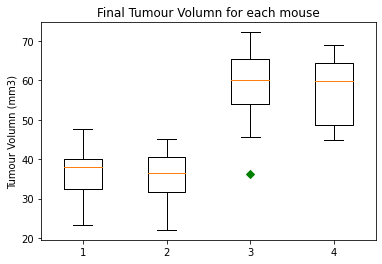

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volumn for each mouse')
ax1.set_ylabel('Tumour Volumn (mm3)')

#changing color of the outlier with gD
ax1.boxplot(tumor_vol_list, 0, 'gD')
plt.show()


## Line and Scatter Plots

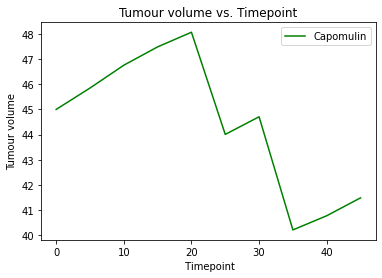

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
label1='Capomulin'
#x_axis = result_df.loc[result_df["Drug Regimen"] == "Capomulin",['Tumour Volume (mm3)']]
#y_axis = result_df.loc[result_df["Drug Regimen"] == "Capomulin",['Timepoint']]

capomulin_table = result_df.loc[result_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumour Volume (mm3)'],color="green",label=label1)

plt.legend(loc="best")
plt.title("Tumour volume vs. Timepoint")
plt.xlabel(" Timepoint")
#plt.xticks(np.arange(min(years),max(years)+1,1.0))
plt.ylabel("Tumour volume")

plt.show()

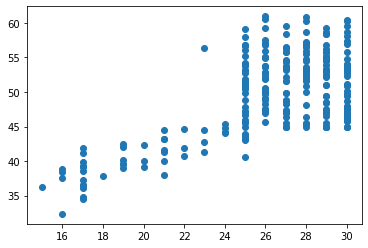

In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_average = result_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])
plt.show()

## Correlation and Regression

The r-squared is: 0.43501643801595974


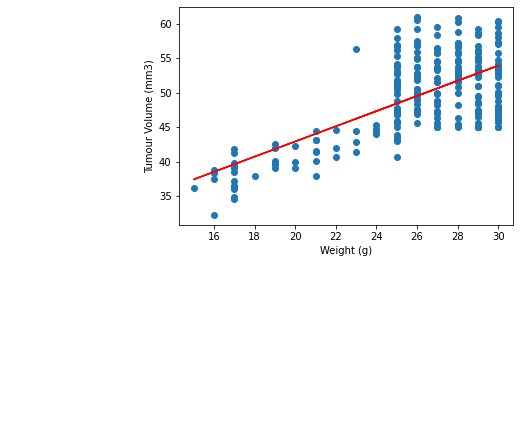

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumour Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()